<a href="https://colab.research.google.com/github/gayathriii284/ml-beginner-project-heartDiseasePrediction/blob/main/Heart_Disease_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Heart_Disease.csv to Heart_Disease (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_score,f1_score,recall_score,accuracy_score,confusion_matrix,classification_report,plot_roc_curve
from sklearn.model_selection import cross_val_score

In [ ]:
dataset=pd.read_csv('Heart_Disease.csv')
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#**Dataset Description:**
1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
     1. Value 0: typical angina
     2. Value 1: atypical angina
     3. Value 2: non-anginal pain
     4. Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
     1. Value 0: normal
     2. Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
     3. Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
     1. Value 0: upsloping
     2. Value 1: flat
     3. Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target:0=no heart disease,1=heart disease









In [ ]:
#split into X,y
X=dataset.drop('target',axis=1)
y=dataset['target']

In [ ]:
#from this you get information about ur dataset(presence of missing values,datatypes,shape)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
dataset.target.value_counts()

1    165
0    138
Name: target, dtype: int64



```
Here,our dataset is balanced since we have almost equal numbers of 0s and 1s as targets.
```



#**Exploratory Data Analysis:**

####Relationship Between Sex and Heart Disease:

In [ ]:
#Using crosstab:
pd.crosstab(dataset.sex,dataset.target)

target,0,1
sex,,
0,24,72
1,114,93


In [ ]:
dataset.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

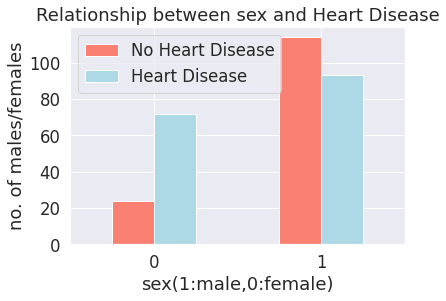

In [ ]:
#visualizing the crosstab:
pd.crosstab(dataset.sex,dataset.target).plot(kind='bar',
                                   color=['salmon','lightblue'] );
plt.title('Relationship between sex and Heart Disease')
plt.ylabel('no. of males/females')
plt.xlabel('sex(1:male,0:female)')
plt.legend(['No Heart Disease','Heart Disease'])
plt.xticks(rotation=0); #to make the 0 and 1 straight(x axis)

* *Out of 96 females,nearly 75%(72/96 as shown in the crosstab)of them suffer from heart disease*
* *Out of 207 males,nearly 50%(93/207 as shown in crosstab)of them suffer from heart disease*


*Thus almost 62.5% of individuals(females and males) suffer from heart disease.*

### Heart Disease as a function of age and maximum heart rate(thalach):

In [ ]:
dataset.thalach.value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64



```
* Here length:91 indicates 91 types of different values for the feature thalach.
* We cant represent so many values using a bargraph.
* So we use a scatter plot.
```



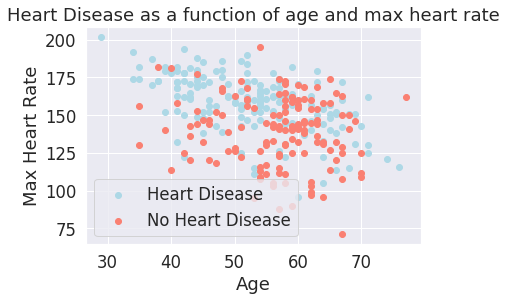

In [ ]:
#creating a scatter plot for age and thalach
#With heart disease:
plt.scatter(dataset.age[dataset.target==1],dataset.thalach[dataset.target==1],
            color=['lightblue']) #we can observe a downward trend for this scatter plot
#Without heart disease:
plt.scatter(dataset.age[dataset.target==0],dataset.thalach[dataset.target==0],
            color=['salmon'])
plt.title('Heart Disease as a function of age and max heart rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Heart Disease','No Heart Disease']);

* *From this scatter plot,we infer that a younger person has higher heart rate and it reduces as the person ages.*
* *Also,we can see a downward trend,however its very difficult to find patterns from this plot to seperate the red and blue points and might take time.*

* *Thus we want our algorithm to figure out the remaining patterns.*
* *Also,we have to figure put if there are any outliers or not and eradicate them or keep them accordingly.i.e. age of a person beyond 100 or below 10 can be considered as an outlier and we need to decide whether we want to keep them,or train our model to fit the outliers.*

*Thus we can check the distrubution of age(using a histogram)*

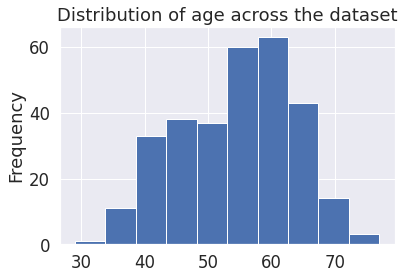

In [ ]:
dataset.age.plot.hist()
plt.title('Distribution of age across the dataset');

*The histogram shows that there are more number of people in the dataset between the age 50-60*

### Heart Disease frequency per chest pain type(cp):

* cp: chest pain type
     * Value 0: typical angina:discomfort that is noted when the heart does not get enough blood or oxygen.
     * Value 1: atypical angina:noncardiac causes of chest pain.
     * Value 2: non-anginal pain:chest pain is related to a problem with the esophagus.
     * Value 3: asymptomatic:No symptoms.

In [ ]:
ct_cp=pd.crosstab(dataset.cp,dataset.target)
ct_cp

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


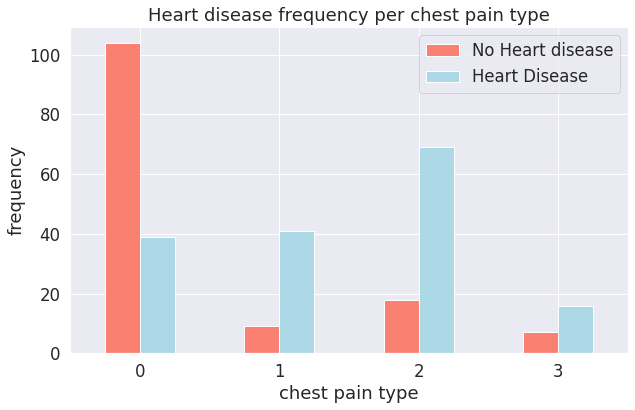

In [ ]:
#visualizing the crosstab
ct_cp.plot(kind='bar',
           figsize=(10,6),
           color=['salmon','lightblue'])
plt.title('Heart disease frequency per chest pain type')
plt.xlabel('chest pain type')
plt.ylabel('frequency')
plt.legend(['No Heart disease','Heart Disease'])
plt.xticks(rotation=0);

*From the graph,its clear that the frequency of heart disease is more for chest pain type 2:non anginal chest pain,compared to other types chest pain.*

### Heart Disease frequency for exang:

In [ ]:
ct_ex=pd.crosstab(dataset.exang,dataset.target)
ct_ex

target,0,1
exang,,
0,62,142
1,76,23


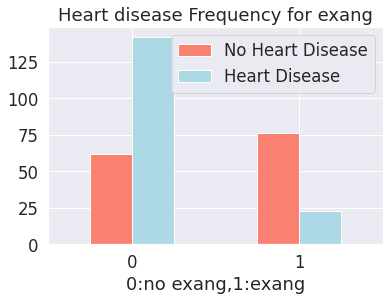

In [ ]:
#visualizing this:
ct_ex.plot(kind='bar',
           color=['salmon','lightblue'])
plt.title('Heart disease Frequency for exang')
plt.xlabel('0:no exang,1:exang')
plt.legend(['No Heart Disease','Heart Disease'])
plt.xticks(rotation=0);

*The graph shows that individuals who do not have excercise induced angina did have heart disease which is quite contrary to what we'd expect.Thus it shows a negative correlation(as exang increases,target decreases).*

### Correaltion between independent and dependent variables:

In [ ]:
corr_matrix=dataset.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


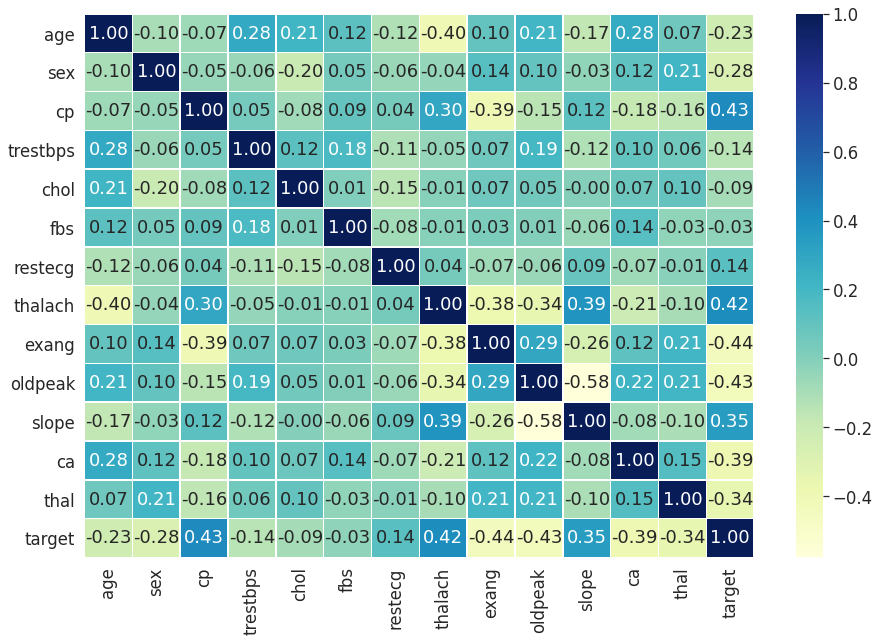

In [ ]:
#visualizing this matrix using a heatmap
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt='0.2f',
               cmap='YlGnBu')

* *Positive correlation:directly correlated(increase in one feature causes increase in the other).*
* *Negative correlation:inversly correlated(increase in one feature causes decrease in the other).*

## **Making predictions using ML Models:**

In [ ]:
#splitting data into train and test
np.random.seed(42) #to get constant results
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
#models chosen by considering the ML map
models={'Logistic Regression':LogisticRegression(),
        'KNN':KNeighborsClassifier(),
        'Random Forest':RandomForestClassifier()} 

In [ ]:
#creating a function to train and evaluate our models
model_scores={}
def fit_and_eval(models,X_train,X_test,y_train,y_test):
  """
  Function to fit the models in the 'models' dictionary and evaluate them.
  This function returns a dictionary of scores of each models.
  """
  np.random.seed(42)
  for name,model in models.items():
    """
    name is the key,model is the value in the dictionary 'models'
    """
    model.fit(X_train,y_train)
    model_scores[name]=model.score(X_test,y_test)
  return model_scores

In [ ]:
model_scores=fit_and_eval(models,X_train,X_test,y_train,y_test)
model_scores

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

In [ ]:
#thus without tuning,logistic regression yields the highest accuracy score

Comparison of Models:

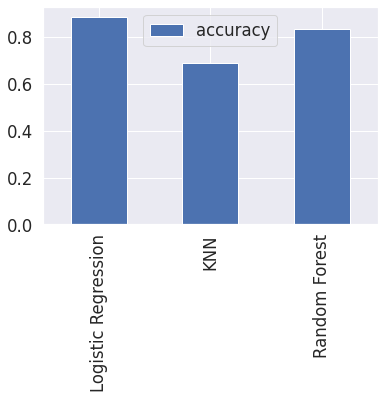

In [ ]:
model_cmp=pd.DataFrame(model_scores,index=['accuracy']) #index refers to the row label
model_cmp.T.plot(kind='bar')

*Thus the logistic regression yields the highest accuracy score of about 88% and random forest still does good with a score of 83%.We would eliminate KNN which has a poor score of 69%.*

What to do to improve our classification models?
  * Hyperparameter Tuning
  * Feature importance
  * accuracy score
  * precision
  * recall
  * F1 score
  * confusion matrix
  * classification report
  * ROC curve
  * Area under the curve(AUC)

**Hyperparameter tuning:**

In [ ]:
#First start by tuning the KNN model to see if it improves(by Hand):

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
#trying 1-20 values for k_neighbors hyperparameter
neighbors=range(1,21)
#create 2 lists for keeping the train and test scores to evaluate the model
train_scores=[]
test_scores=[]
#iterate to update the parameters
np.random.seed(42)
for i in neighbors:
  knn.set_params(n_neighbors=i)
  #fit the model with 'i' neighbors
  knn.fit(X_train,y_train)
  #update the train and test scores
  train_scores.append(knn.score(X_train,y_train))
  test_scores.append(knn.score(X_test,y_test))
print("train scores are:",train_scores)
print('test scores are:',test_scores)

train scores are: [1.0, 0.8099173553719008, 0.7727272727272727, 0.743801652892562, 0.7603305785123967, 0.7520661157024794, 0.743801652892562, 0.7231404958677686, 0.71900826446281, 0.6942148760330579, 0.7272727272727273, 0.6983471074380165, 0.6900826446280992, 0.6942148760330579, 0.6859504132231405, 0.6735537190082644, 0.6859504132231405, 0.6652892561983471, 0.6818181818181818, 0.6694214876033058]
test scores are: [0.6229508196721312, 0.639344262295082, 0.6557377049180327, 0.6721311475409836, 0.6885245901639344, 0.7213114754098361, 0.7049180327868853, 0.6885245901639344, 0.6885245901639344, 0.7049180327868853, 0.7540983606557377, 0.7377049180327869, 0.7377049180327869, 0.7377049180327869, 0.6885245901639344, 0.7213114754098361, 0.6885245901639344, 0.6885245901639344, 0.7049180327868853, 0.6557377049180327]


max test score: 0.7540983606557377


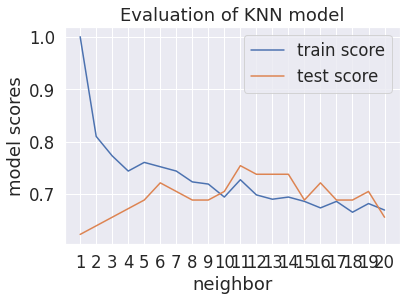

In [ ]:
#visualizing these scores:
plt.plot(neighbors,train_scores,label='train score')
plt.plot(neighbors,test_scores,label='test score')
plt.xlabel('neighbor')
plt.ylabel('model scores')
plt.legend()
plt.title('Evaluation of KNN model')
print("max test score:",max(test_scores))
plt.xticks(np.arange(1,21,1)); #x axis is from 1-20 incremented by step 1

*Thus from the graph,model with 11 neighbors gives the maximum test score of 75%.However its still very less compared to the scores obtained by the other 2 models.Thus now we can start tuning better models.Also,since here we have only one parameter to tune we can use for loop.Else using for loop would make the code very inefficient.*

Now we tune Logistic regression and Random forest using randomized search CV:

In [ ]:
#grid for logistic regression:
lr_grid={'C':np.logspace(-4,4,20), #logspace returns the numbers evenly placed on a log scale between -4 and 4
         'solver':['liblinear']}
#grid for random forest:
rf_grid={'n_estimators':np.arange(10,1000,50),
         'max_depth':[None,3,5,10],
         'min_samples_split':np.arange(2,20,2),
         'min_samples_leaf':np.arange(1,20,2)}

In [ ]:
np.random.seed(42)
#performing randomized search
rs_log_clf=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=lr_grid,
                              cv=5,
                              n_iter=20,
                              verbose=2)
#fitting this new model
rs_log_clf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.00026366508987303583 ......................
[CV] ....... solver=liblinear, C=0.00026366508987303583, total=   0.0s
[CV] solver=liblinear, C=0.00026366508987303583 ......................
[CV] ....... so

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......... solver=liblinear, C=0.23357214690901212, total=   0.0s
[CV] solver=liblinear, C=0.23357214690901212 .........................
[CV] .......... solver=liblinear, C=0.23357214690901212, total=   0.0s
[CV] solver=liblinear, C=0.23357214690901212 .........................
[CV] .......... solver=liblinear, C=0.23357214690901212, total=   0.0s
[CV] solver=liblinear, C=0.23357214690901212 .........................
[CV] .......... solver=liblinear, C=0.23357214690901212, total=   0.0s
[CV] solver=liblinear, C=0.23357214690901212 .........................
[CV] .......... solver=liblinear, C=0.23357214690901212, total=   0.0s
[CV] solver=liblinear, C=0.615848211066026 ...........................
[CV] ............ solver=liblinear, C=0.615848211066026, total=   0.0s
[CV] solver=liblinear, C=0.615848211066026 ...........................
[CV] ............ solver=liblinear, C=0.615848211066026, total=   0.0s
[CV] solver=liblinear, C=0.615848211066026 ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [ ]:
#check the best parameters selected after performing randomizedSearchCV
rs_log_clf.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [ ]:
rs_log_clf.score(X_test,y_test)

0.8852459016393442

Here,we get the same score as the baseline model even after tuning.Thus now we can look for Random Forest tuning.

In [ ]:
np.random.seed(42)
#Run randomised search for random forest
rs_rf_clf=RandomizedSearchCV(RandomForestClassifier(),
                             param_distributions=rf_grid,
                             cv=5,
                             n_iter=20,
                             verbose=2)
#fit this new model to the training set
rs_rf_clf.fit(X_train,y_train)
                          

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   0.7s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   0.7s
[CV] n_estimators=510, min_samples

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rs_rf_clf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 19,
 'min_samples_split': 4,
 'n_estimators': 210}

In [ ]:
#now find out the score
rs_rf_clf.score(X_test,y_test)

0.8688524590163934

Even after improving scores a little bit after tuning random forest(baseline model score:83%,tuned model score:87%),logistic regression without tuning still performs well.

Thus now,we will perform GridSearchCV to improve the logistic regression:

In [ ]:
#creating the grid for logistic regression for grid search
gs_lr_grid={'C':np.logspace(-4,4,30),
            'solver':['liblinear']}
#start the grid seearch
gs_lr_clf=GridSearchCV(LogisticRegression(),
                       param_grid=gs_lr_grid,
                       cv=5,
                       verbose=2)
#fit the new model
gs_lr_clf.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, solver=liblinear ......................
[CV] ....... C=0.00018873918221350977, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, solver=liblinear ......................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.01610262027560939, solver=liblinear, total=   0.0s
[CV] C=0.01610262027560939, solver=liblinear .........................
[CV] .......... C=0.01610262027560939, solver=liblinear, total=   0.0s
[CV] C=0.01610262027560939, solver=liblinear .........................
[CV] .......... C=0.01610262027560939, solver=liblinear, total=   0.0s
[CV] C=0.01610262027560939, solver=liblinear .........................
[CV] .......... C=0.01610262027560939, solver=liblinear, total=   0.0s
[CV] C=0.03039195382313198, solver=liblinear .........................
[CV] .......... C=0.03039195382313198, solver=liblinear, total=   0.0s
[CV] C=0.03039195382313198, solver=liblinear .........................
[CV] .......... C=0.03039195382313198, solver=liblinear, total=   0.0s
[CV] C=0.03039195382313198, solver=liblinear .........................
[CV] .......... C=0.03039195382313198, solver=liblinear, total=   0.0s
[CV] C=0.03039195382313198, solver=liblinear .........................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [ ]:
#look the best params
gs_lr_clf.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
#checking the score
gs_lr_clf.score(X_test,y_test)

0.8852459016393442

**Evaluating the new tuned model beyond accuracy:**

We can evaluate it using the following metrics:
* Confusion matrix
* Feature importance
* Classification report
* precision
* recall
* F1 score
* ROC curve.

Use cross validation wherever possible

ROC curve:

In [ ]:
#predicting the values our model predicts on test set
y_pred=gs_lr_clf.predict(X_test)

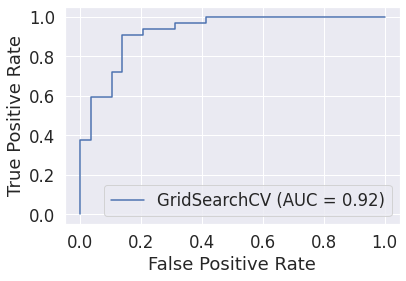

In [ ]:
#plotting the ROC curve
plot_roc_curve(gs_lr_clf,X_test,y_test) #always evaluate ur models on test sets

* *Here we got an AUC score of 0.92 which is pretty good(perfect model has an AUC score of 1.0).*
* *ROC curve plots true positives against false positives*

Confusion Matrix:

In [ ]:
confusion_matrix(y_test,y_pred)

array([[25,  4],
       [ 3, 29]])

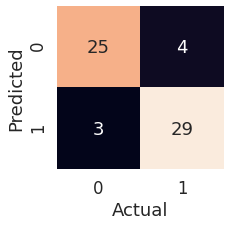

In [ ]:
#visualising the confusion matrix
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_pred):
  """
  This function plots the confusuion matrix and gives a better visual
  representation.
  """
  fig,ax=plt.subplots(figsize=(3,3))
  ax=sns.heatmap(confusion_matrix(y_test,y_pred),
                 annot=True,
                 cbar=False)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
plot_conf_mat(y_test,y_pred)

*Here we have 4 false negatives(predicted 0 when true was 1) and 3 false positives(predicted 1 when true was 0).Depending on our model,we can chose which one do we want to reduce.However over here,in case of heart disease,both are dangerous and need to be reduced.*

Classification report:

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Now,we can try these evaluation metrics on different splits of train and test data using cross validation.

**Cross Validation:**

In [ ]:
#check the best parameters
gs_lr_clf.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
#Now,create a logistic regression model with the best parameters
clf=LogisticRegression(C=0.20433597178569418,
                       solver='liblinear')

In [ ]:
#create a dictionary of the evaluation metrics
eval_metric={'cv_acc':'accuracy',
             'cv_precision':'precision',
             'cv_recall':'recall',
             'cv_f1':'f1'}
#create an empty dictionary for cv scores
cv_metrics={}

In [ ]:
def cross_validated_metric(eval_metric):
  """
  This function performs cross validation and returns the evaluation
  metrics for each split
  """
  for name,metric in eval_metric.items():
    #accessing the name and key of the eval_metric dictionary
    cv_metrics[name]=np.mean(cross_val_score(clf,
                                             X,
                                             y,
                                             cv=5,
                                             scoring=metric))
  return cv_metrics

In [ ]:
cv_metrics=cross_validated_metric(eval_metric)
cv_metrics

{'cv_acc': 0.8446994535519124,
 'cv_f1': 0.8673007976269721,
 'cv_precision': 0.8207936507936507,
 'cv_recall': 0.9212121212121213}

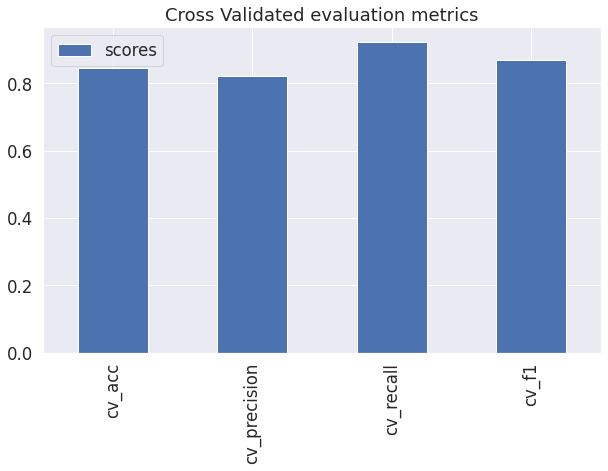

In [ ]:
#Now we can visualize the cross validation results
cv_frame=pd.DataFrame(cv_metrics,index=['scores'])
cv_frame.T.plot.bar(title='Cross Validated evaluation metrics',figsize=(10,6));

*From the graph,we can see that our logstic regression model performs very well on recall,and does a good job in the other metrics too.*

Feauture importance:

Finding out features that contribute more in predicting the target.

In [ ]:
#finding out how the features are related to the target
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#doing feature importance
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [ ]:
#making it in a more understandable way
feature_dict=dict(zip(dataset.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'ca': -0.6373332766360461,
 'chol': -0.0016649614843449207,
 'cp': 0.660014324982524,
 'exang': -0.604701713592625,
 'fbs': 0.040172360271308105,
 'oldpeak': -0.5679545646616215,
 'restecg': 0.31603405294617176,
 'sex': -0.8606204883695241,
 'slope': 0.4508539209693025,
 'thal': -0.6755509369619848,
 'thalach': 0.02458922341328129,
 'trestbps': -0.01155970600550047}

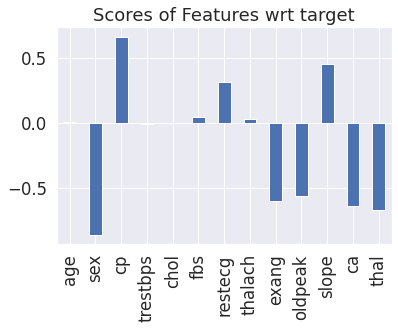

In [ ]:
#visualizing this
feature_frame=pd.DataFrame(feature_dict,index=[0])
feature_frame.T.plot.bar(title='Scores of Features wrt target',legend=False)

*This is somewhat similar to correlation matrix.Here,a positive high value indicates that increase in that particular feature increases the target value,whereas negative high value indicates that increasing the feature decreases the target value.*

# **Reviewing the project:**

If you're project hasnt hit the expected evaluation metric,then u can:
* Collect more data
* Try improving your model
* Try new models like CatBoost or XGBoost.

If you're has hit the evaluation metric,then see how would you share it or export it.
